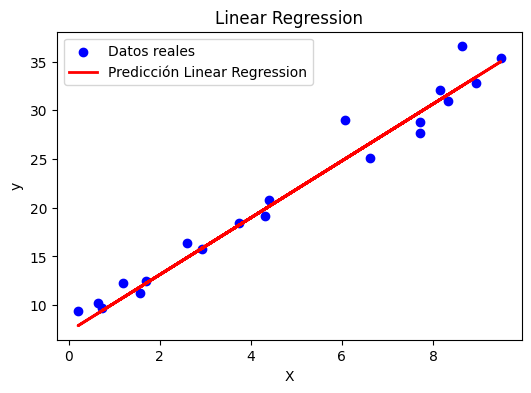

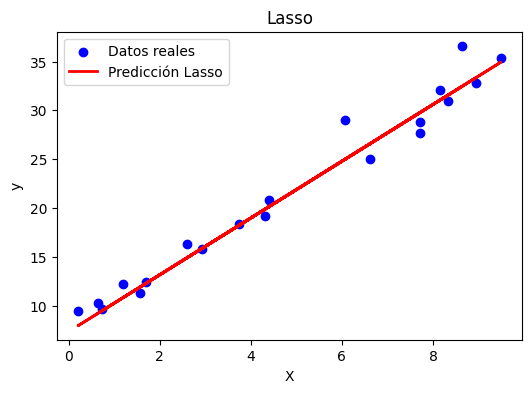

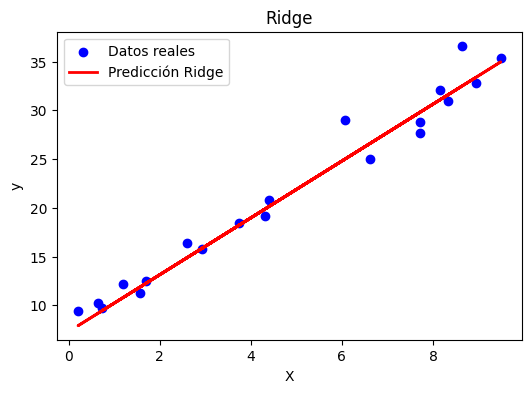

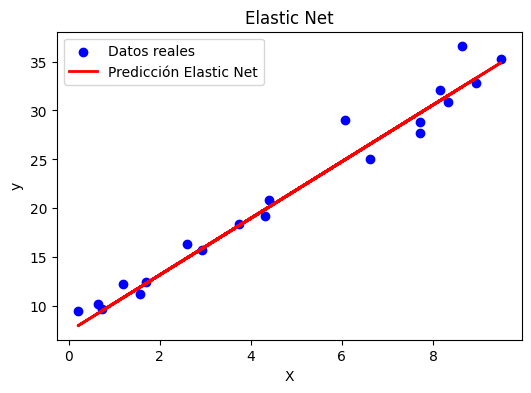


Métricas de los modelos:
      Linear Regression     Lasso     Ridge  Elastic Net
MAE            1.182685  1.171313  1.178541     1.160529
MSE            2.614798  2.604322  2.610662     2.596925
RMSE           1.617034  1.613791  1.615754     1.611498
R2             0.968635  0.968760  0.968684     0.968849


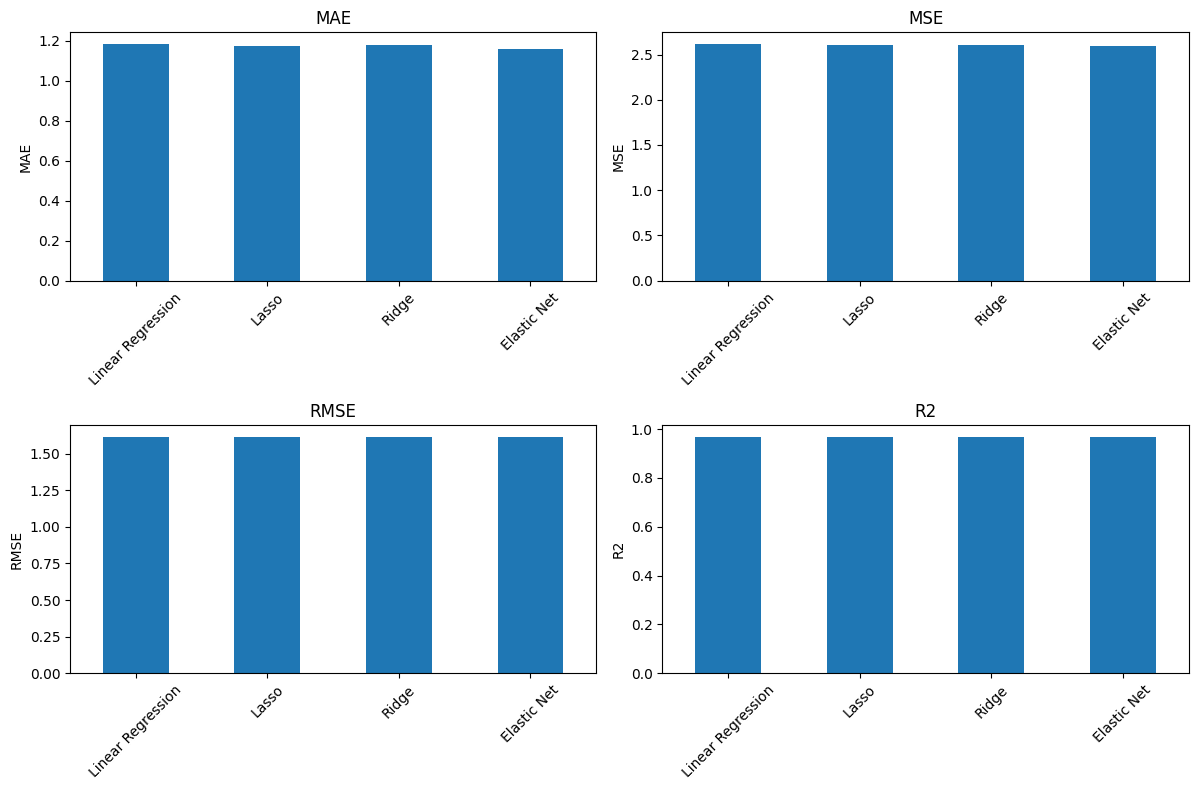

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Datos de ejemplo
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + 7 + np.random.randn(100) * 2

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Diccionario para guardar métricas
results = {}

# Entrenar, predecir y calcular métricas para cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = [mae, mse, rmse, r2]
    
    # Gráfico de cada modelo
    plt.figure(figsize=(6,4))
    plt.scatter(X_test, y_test, color="blue", label="Datos reales")
    plt.plot(X_test, y_pred, color="red", linewidth=2, label=f"Predicción {name}")
    plt.title(f"{name}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Mostrar métricas en tabla
df_results = pd.DataFrame(results, index=["MAE", "MSE", "RMSE", "R2"])
print("\nMétricas de los modelos:")
print(df_results)

# Gráfico comparativo de métricas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
metrics = ["MAE", "MSE", "RMSE", "R2"]

for ax, metric in zip(axes.flat, metrics):
    df_results.loc[metric].plot(kind="bar", ax=ax, title=metric)
    ax.set_ylabel(metric)
    ax.set_xticklabels(df_results.columns, rotation=45)

plt.tight_layout()
plt.show()
